### 📜 Sobre o Conjunto de Dados

O **Conjunto de Dados de Tendências de Compras** oferece uma visão abrangente sobre os comportamentos dos consumidores no setor de varejo.

Abrangendo diversos elementos transacionais, demográficos e comportamentais, este conjunto de dados é uma fonte valiosa para compreender as preferências de compras dos clientes e aplicar estratégias de varejo baseadas em dados.

#### **Colunas do Conjunto de Dados**
* Customer ID = Número de identificação exclusivo que identifica o cliente.
* Age = Idade do cliente.
* Gender = Gênero do cliente (feminino, masculino, etc.).
* Item Purchased = Nome do produto comprado pelo cliente.
* Category = Categoria à qual o produto pertence (ex.: vestuário, eletrônicos).
* Purchase Amount (USD) = Valor total da compra do cliente (em dólares americanos).
* Location = Região geográfica ou cidade onde o cliente está localizado.
* Size = Tamanho do produto comprado (ex.: P, M, G, GG).
* Color = Cor do produto comprado.
* Season = Estação em que a compra foi realizada (ex.: verão, inverno).
* Review Rating = Classificação dada pelo cliente ao produto (geralmente de 1 a 5).
* Subscription Status = Status de assinatura do cliente.
* Payment Method = Método usado pelo cliente para o pagamento (ex.: cartão de crédito, PayPal).
* Shipping Type = Método de envio do produto (ex.: envio padrão, envio expresso).
* Discount Applied = Taxa de desconto aplicada durante a compra.
* Promo Code Used = Código promocional usado pelo cliente durante a compra.
* Previous Purchases = Lista de compras anteriores do cliente.
* Preferred Payment Method = Método de pagamento preferido pelo cliente.
* Frequency of Purchases = Frequência com que o cliente realiza compras (ex.: uma vez por semana, uma vez por mês).

## 📚 Importando Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 💾 Carregando o Conjunto de Dados

In [3]:
df = pd.read_csv('../data/shopping_trends.csv')

## 📊 Explorando Conjunto de dados

In [4]:
# Visualizando primeiros registros
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
# Visualização rápida e resumida do dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [6]:
# Verificando se há ausência de valores
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [8]:
df.drop(columns='Customer ID', inplace=True)

In [9]:
# Separando colunas em dois grupos com base no tipo de dado de cada coluna
# Colunas numéricas (int64 e float64)
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

# Colunas categóricas (object ou string)
object_cols = df.select_dtypes(include=['object'])

print('Colunas Numéricas:\n', numeric_cols.columns.to_list())
print('Colunas Categóricas:\n', object_cols.columns.to_list())

Colunas Numéricas:
 ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Colunas Categóricas:
 ['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color', 'Season', 'Subscription Status', 'Payment Method', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Preferred Payment Method', 'Frequency of Purchases']


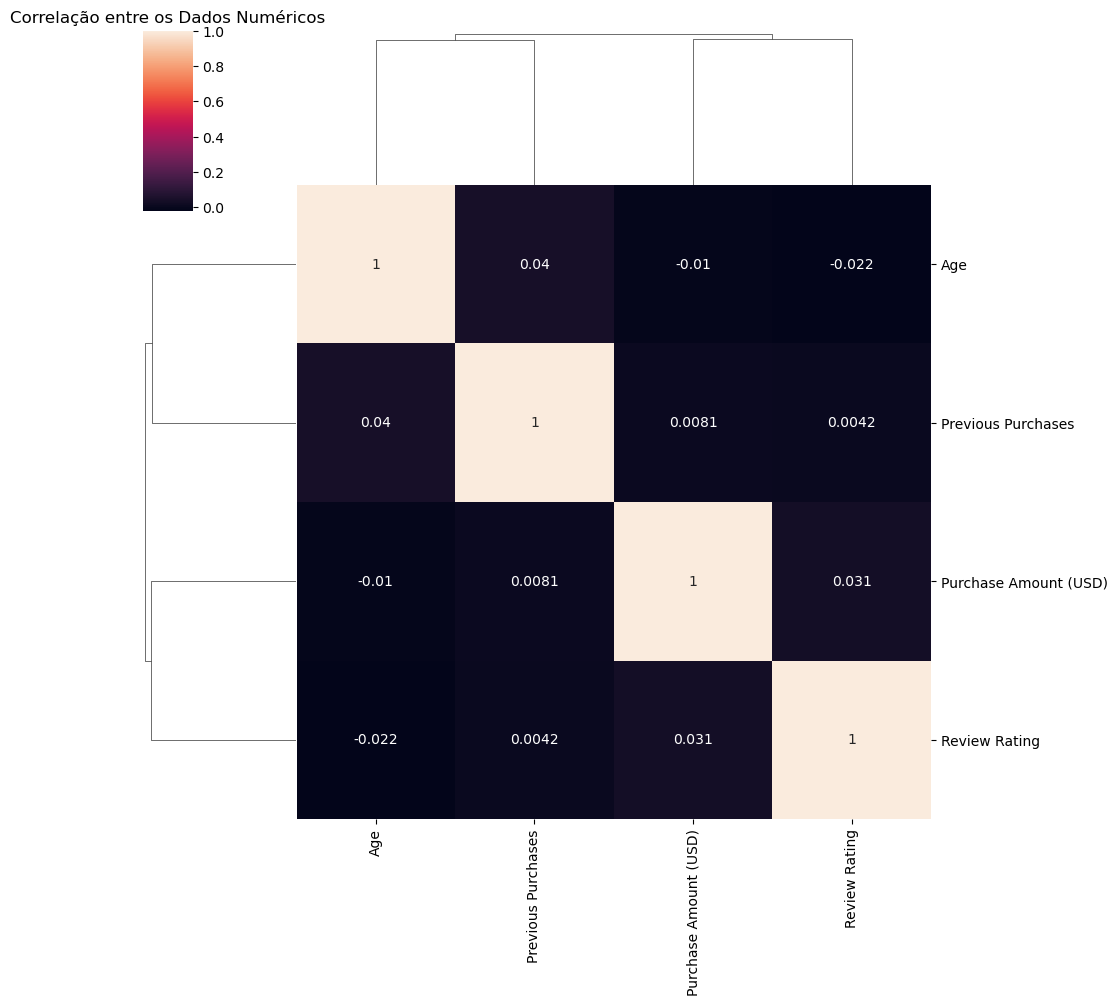

In [10]:
corr_matrix = numeric_cols.corr()

sns.clustermap(corr_matrix, annot = True)
plt.title("Correlação entre os Dados Numéricos")
plt.show()

In [21]:
def visualizacao_outlier(df):
  num_cols = len(df.columns)
  fig, axes = plt.subplots(1, num_cols, figsize=(3 * num_cols, 3))
  fig.suptitle("Boxplots das Características", fontsize=16)
  
  for i, col in enumerate(df.columns):
      sns.boxplot(x=df[col], ax=axes[i])
      axes[i].set_title(f'Boxplot de {col}')
    
  plt.tight_layout()
  plt.subplots_adjust(top=0.70)  # Deixe um espaço entre o título e os gráficos
  plt.show()

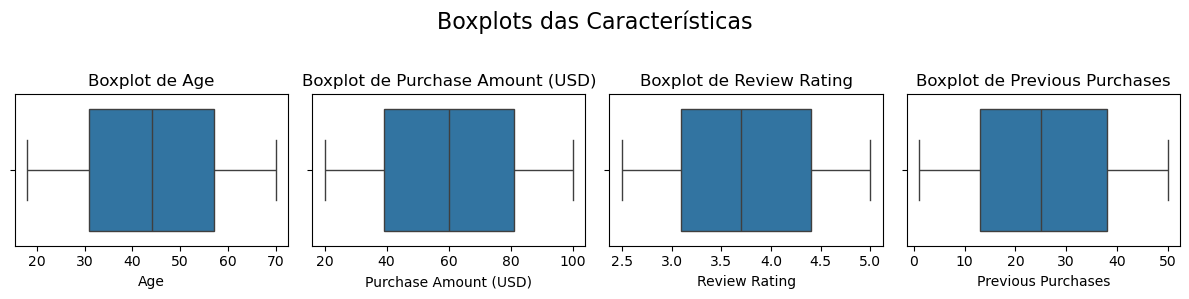

In [22]:
visualizacao_outlier(numeric_cols)